# 🧪 Exploratory Data Analysis: Suicide Rates vs GDP per Capital

 # Step 1: Load Libraries & Dataset

In [1]:
# Basic Liabraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Dispaly Setting 
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [6]:
# Load dataset 
df = pd.read_csv("age_std_suicide_rates_1990-2022.csv")

In [7]:
# Preview data 
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,33,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Female,14,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993,Male,46,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993,Female,27,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994,Male,37,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


# 🧹 Step 2: Data Cleaning

In [8]:
# Check for null values
df.isnull().sum()

RegionCode                        0
RegionName                        0
CountryCode                       0
CountryName                       0
Year                              0
Sex                               0
SuicideCount                      0
CauseSpecificDeathPercentage      1
StdDeathRate                    208
DeathRatePer100K                208
Population                      296
GDP                             362
GDPPerCapita                    362
GNI                             498
GNIPerCapita                    538
InflationRate                   723
EmploymentPopulationRatio       556
dtype: int64

In [9]:
# Drop rows with missing essential values for our analysis
df = df.dropna(subset=['GDPPerCapita', 'DeathRatePer100K', 'CountryName', 'Year'])

In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [12]:
# Drop duplicates if any
df = df.drop_duplicates()

In [13]:
# Check data types
df.dtypes

RegionCode                       object
RegionName                       object
CountryCode                      object
CountryName                      object
Year                              int64
Sex                              object
SuicideCount                      int64
CauseSpecificDeathPercentage    float64
StdDeathRate                    float64
DeathRatePer100K                float64
Population                      float64
GDP                             float64
GDPPerCapita                    float64
GNI                             float64
GNIPerCapita                    float64
InflationRate                   float64
EmploymentPopulationRatio       float64
dtype: object

# 📊 Step 3: Univariate Analysis

Text(0.5, 1.0, 'Distribution of GDP Per Capita')

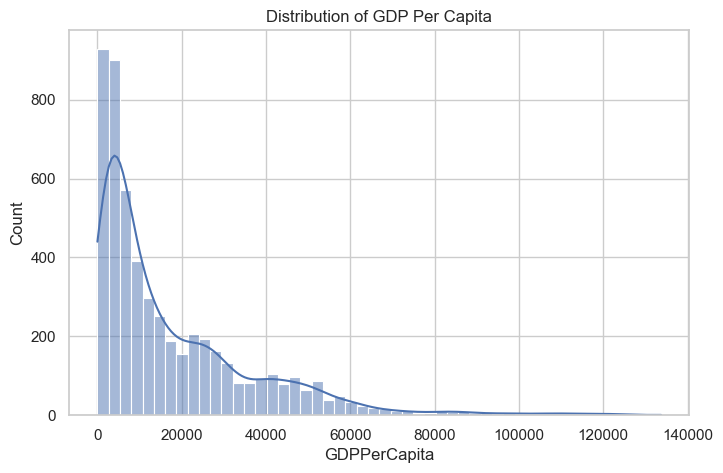

In [15]:
# Distribution of GDP per capita
plt.figure(figsize=(8, 5))
sns.histplot(df['GDPPerCapita'], bins=50, kde=True)
plt.title('Distribution of GDP Per Capita')

Text(0.5, 1.0, 'Distribution of Suicide Rate (per 100K)')

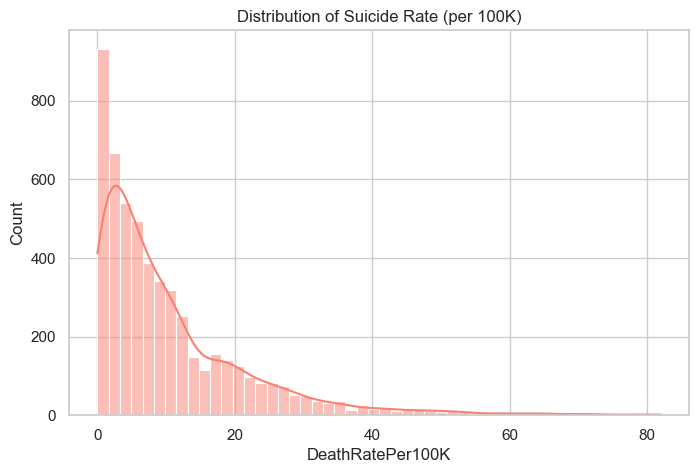

In [16]:
# Distribution of suicide rate per 100k
plt.figure(figsize=(8, 5))
sns.histplot(df['DeathRatePer100K'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Suicide Rate (per 100K)')

Text(0.5, 1.0, 'Count by Gender')

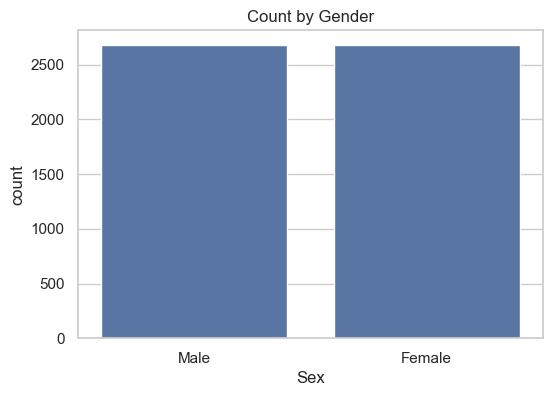

In [17]:
# Count by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title('Count by Gender')

# 📉 Step 4: Bivariate Analysis – GDP vs Suicide Rate

Text(0, 0.5, 'Suicide Rate per 100K')

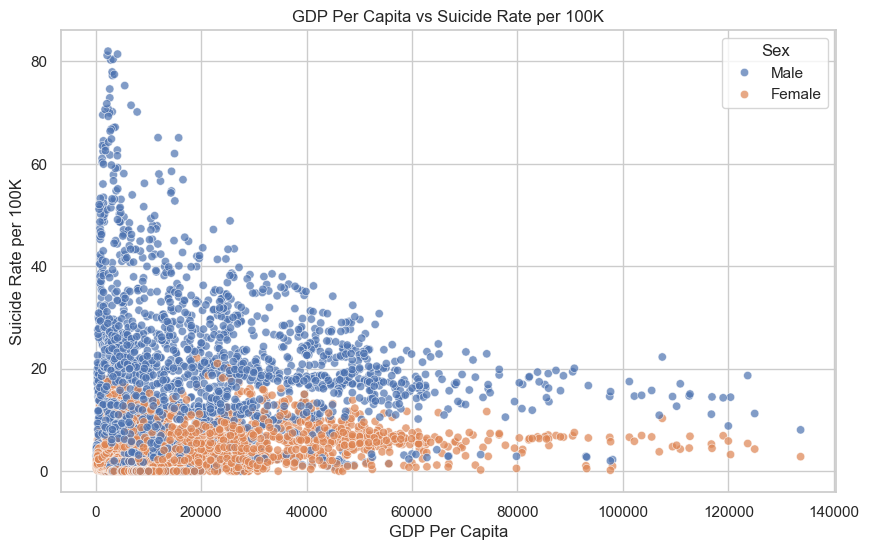

In [18]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDPPerCapita', y='DeathRatePer100K', hue='Sex', alpha=0.7)
plt.title('GDP Per Capita vs Suicide Rate per 100K')
plt.xlabel('GDP Per Capita')
plt.ylabel('Suicide Rate per 100K')

In [19]:
# Correlation
correlation = df[['GDPPerCapita', 'DeathRatePer100K']].corr()
print("Correlation:\n", correlation)

Correlation:
                   GDPPerCapita  DeathRatePer100K
GDPPerCapita          1.000000          0.049463
DeathRatePer100K      0.049463          1.000000


 # Step 5: Trends Over Time

Text(0, 0.5, 'Avg Suicide Rate per 100K')

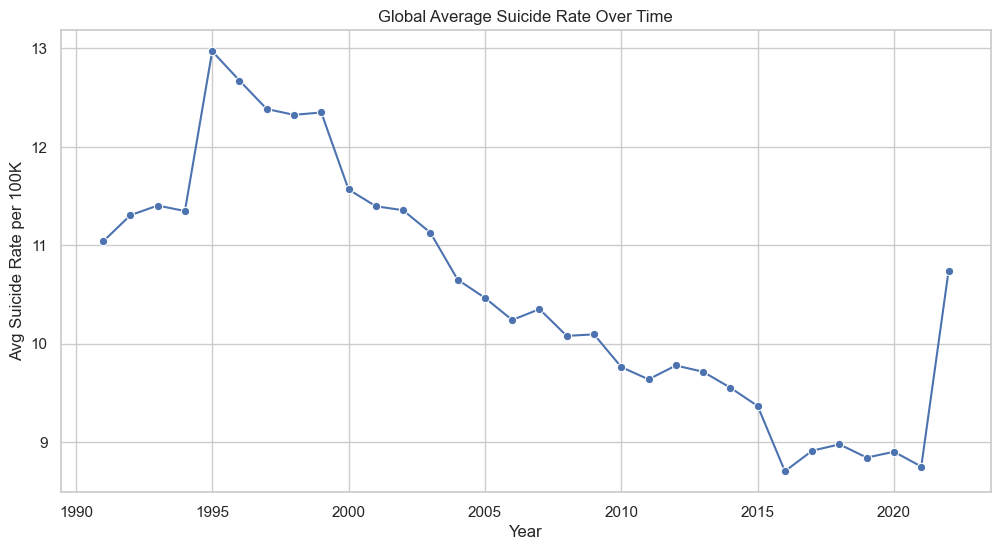

In [20]:
# Global average suicide rate per year
yearly_avg = df.groupby('Year')['DeathRatePer100K'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='Year', y='DeathRatePer100K', marker='o')
plt.title('Global Average Suicide Rate Over Time')
plt.ylabel('Avg Suicide Rate per 100K')

# 👨‍👩‍👧 Step 6: Gender-wise and Country-wise Analysis

Text(0.5, 1.0, 'Suicide Rate Over Time by Gender')

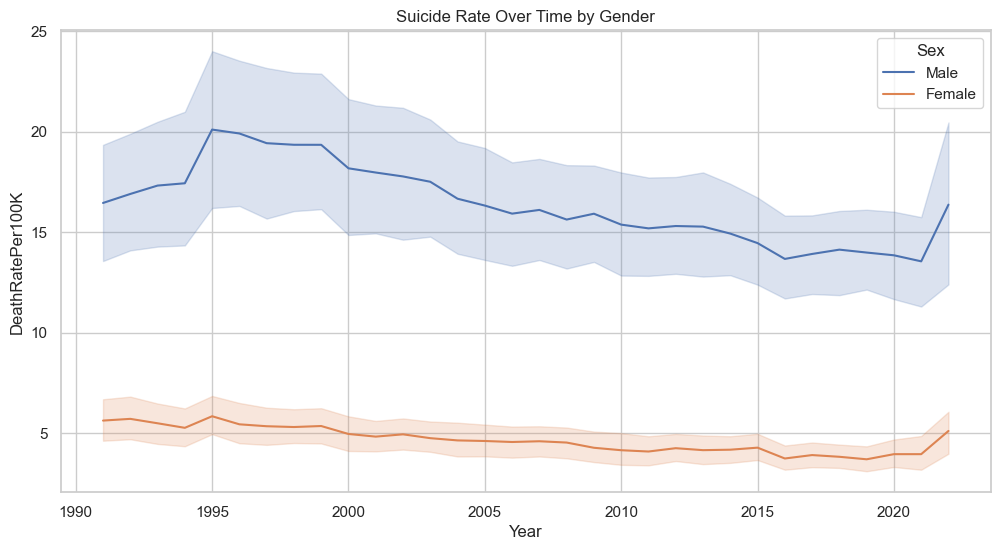

In [21]:
# Suicide rate by gender over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='DeathRatePer100K', hue='Sex', estimator='mean')
plt.title('Suicide Rate Over Time by Gender')

<Axes: ylabel='CountryName'>

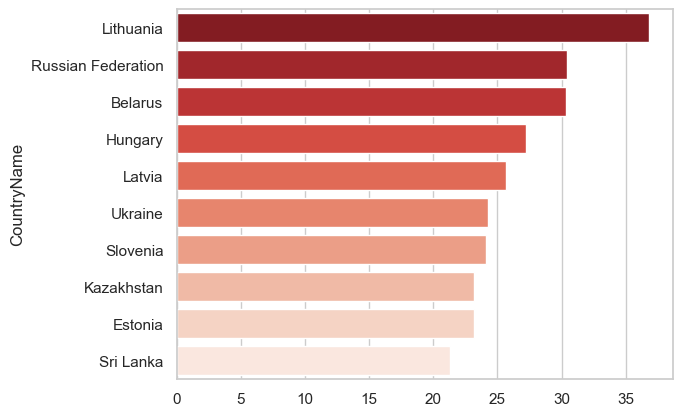

In [23]:
# Top 10 countries with highest average suicide rate
top_countries = df.groupby('CountryName')['DeathRatePer100K'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_countries.values, 
            y=top_countries.index, 
            hue=top_countries.index,  # Add this
            palette='Reds_r',
            legend=False)  # Add this to hide the legend

# Step 7: Outliers Detection

Text(0.5, 1.0, 'Boxplot of GDP Per Capita')

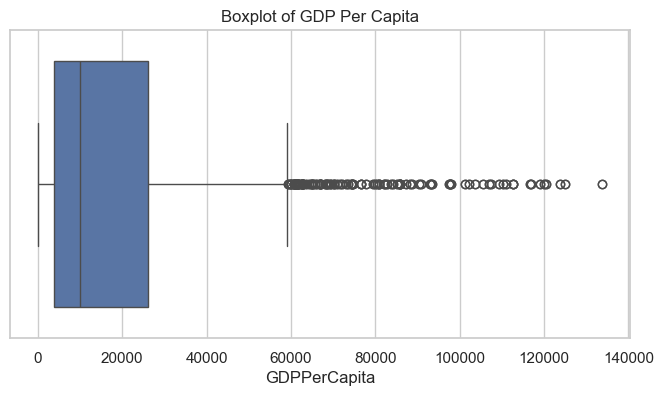

In [24]:
# Boxplot to detect outliers in GDP per Capita
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['GDPPerCapita'])
plt.title('Boxplot of GDP Per Capita')

Text(0.5, 1.0, 'Boxplot of Suicide Rate per 100K')

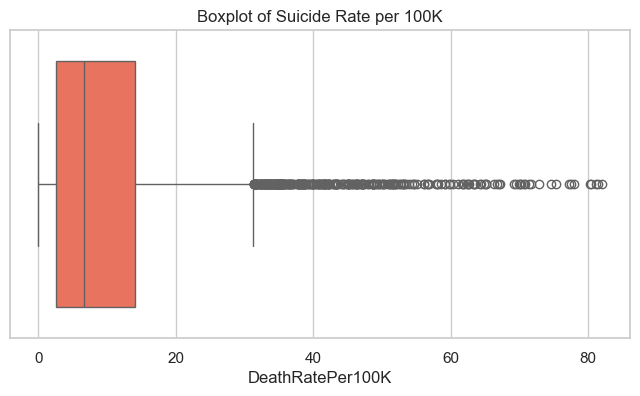

In [25]:
# Boxplot to detect outliers in Suicide Rate
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['DeathRatePer100K'], color='tomato')
plt.title('Boxplot of Suicide Rate per 100K')

# 📌 Step 8: Summary of Insights
You can add this in a Markdown cell:
There's a slightly negative correlation between GDP per capita and suicide rates (higher GDP often → lower suicide).
Male suicide rates are consistently higher than female rates globally.
Some countries have persistently high suicide rates, needing focused study.
There are clear trends over time, with many countries reducing suicide rates since the 2000s.